# Prepare the data for analisys

## LeIA

__English__

We will analyze the sentiment of the news and add the results to the database. We will use the LeIA sentiment analyzer, a tool that uses the VADER lexicon to analyze sentiments in text, adapted for the Portuguese language. The algorithm will return a dictionary with the following keys: 'neg', 'neu', 'pos', and 'compound'. The 'compound' value represents the overall normalized sentiment, ranging from -1 to +1. It can be classified as follows (based on the tool's indications):

* __Positive sentiment:__ compound >= 0.5 
* __Negative sentiment:__ compound <= -0.05 
* __Neutral sentiment:__ compound > -0.5 and compound < 0.05


The other keys represent the respective percentages of negative (neg), neutral (neu), and positive (pos) sentiments present in the text. 


__Portugues__ 

Nos iremos analisar os sentimento das noticias e adicionar os resultados na base de dados, utilizaremos o analisador de sentimentos LeIA, uma ferramenta que usa o lexico VADER para analisar 
sentimentos presenets no texto, porém adaptado para a lingua portuguesa. 
O algoritmo irá retornar um dicionario com as seguintes chaves: 'neg', 'neu', 'pos' and 'compound'.
Compound é o valor de sentimento geral normalizado,que varia de -1 a +1, sendo possivel classificalo da seguinte forma ( baseado na indicação da propria ferramenta )

* __Sentimento positivo:__ compound >= 0.5
* __Sentimento negativo:__ compound <= -0.05
* __Sentimento neutro:__ compound > -0.5 e compound < 0.05

E os demais são as respectivas porcentagens presentes no texto, neg, porcentagem de sentimentos negativos, neu, porcentagem de sentimentos neutros e pos, porcentagem de sentimentos positivos.

In [14]:
from LeIA import SentimentIntensityAnalyzer
import pandas as pd 
from tqdm import tqdm # for progress bar

In [10]:
data_base_fake_news = pd.read_csv(r"preprocessed\preprocessed.csv") # if you has problem, use the path of the file
print(data_base_fake_news.head())

   index label                                  preprocessed_news
0      0  fake  katia abreu diz vai colocar expulsao moldura n...
1      1  fake  ray peita bolsonaro conservador fake entrevist...
2      2  fake  reinaldo azevedo desmascarado policia federal ...
3      3  fake  relatorio assustador bndes mostra dinheiro pub...
4      4  fake  radialista americano fala sobre pt vendem ilus...


Construct database using LeIA

In [16]:
#Leia object creation
analyzer = SentimentIntensityAnalyzer()

# Sentiment analysis and adding the results to the dataframe
for index, row in tqdm(data_base_fake_news.iterrows(), total=len(data_base_fake_news)):
    sentiment = analyzer.polarity_scores(row["preprocessed_news"])
    data_base_fake_news.loc[index, 'sentiment_compound'] = sentiment.get('compound')
    data_base_fake_news.loc[index, 'sentiment_positive'] = sentiment.get('pos')
    data_base_fake_news.loc[index, 'sentiment_negative'] = sentiment.get('neg')
    data_base_fake_news.loc[index, 'sentiment_neutral'] = sentiment.get('neu')
    
    if sentiment.get('compound') >= 0.05:
        data_base_fake_news.loc[index, 'sentiment'] = 'positive'
    elif sentiment.get('compound') <= -0.05:
        data_base_fake_news.loc[index, 'sentiment'] = 'negative'
    else:
        data_base_fake_news.loc[index, 'sentiment'] = 'neutral'


100%|██████████| 7200/7200 [01:13<00:00, 98.03it/s] 


In [20]:
print(data_base_fake_news.head())

   index label                                  preprocessed_news  \
0      0  fake  katia abreu diz vai colocar expulsao moldura n...   
1      1  fake  ray peita bolsonaro conservador fake entrevist...   
2      2  fake  reinaldo azevedo desmascarado policia federal ...   
3      3  fake  relatorio assustador bndes mostra dinheiro pub...   
4      4  fake  radialista americano fala sobre pt vendem ilus...   

   sentiment_compound  sentiment_positive  sentiment_negative  \
0             -0.4741               0.106               0.150   
1             -0.0717               0.110               0.130   
2             -0.5859               0.102               0.118   
3              0.8625               0.143               0.112   
4             -0.9509               0.033               0.266   

   sentiment_neutral sentiment  
0              0.743  negative  
1              0.759  negative  
2              0.780  negative  
3              0.745  positive  
4              0.701  negativ

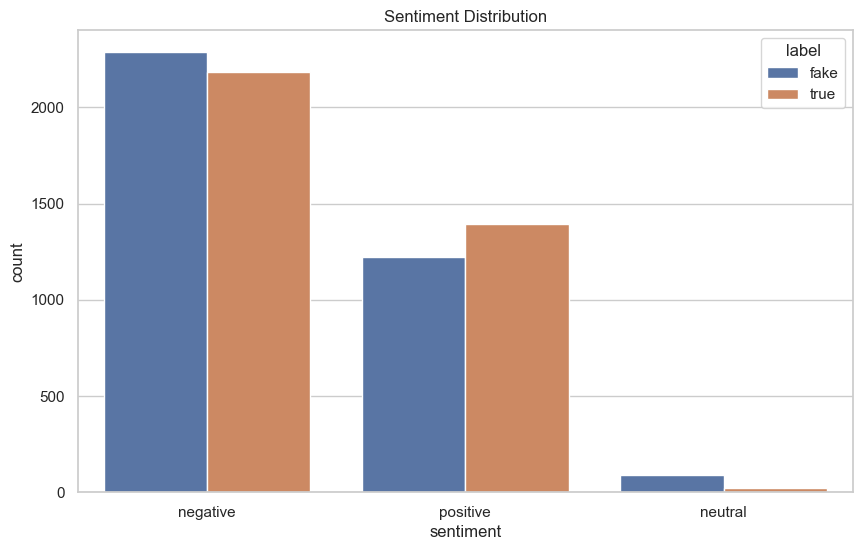

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="sentiment", data=data_base_fake_news, hue='label')
plt.title('Sentiment Distribution')
plt.show()


In [33]:
#save in a new csv file

import os

diretory = r"LeIA" 

if not os.path.exists(diretory):
    os.makedirs(diretory)

csv_file = os.path.join(diretory, 'preprocessed_sentiment_LeIA.csv')


data_base_fake_news.to_csv(csv_file, index=False)

## Transformers 